# Experiments with data

## Univariate Analysis

In [2]:
#loading data
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


#### Univariate Analysis

Here we will explore all variables one by one. Method to perform univariate analysis will depend on whether the variable type is categorical or continuous. So lets consider those individually.

In [3]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

Here we can see that there are 3 continuous variables and 9 categorical variables, where the last one (Income Group) is the outcome itself. Let's perform univariate analysis on each type.

### 1. Continuous Variables:

In case of continuous variables, we generally focus on measure of central tendency and spread of data such as Mean, Median, Range, IQR and Standard Deviation. Lets implement them using Pandas in python.

Pandas dataframes have an inbuilt routine called describe which does the job.

In [4]:
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


### 2. Categorical Variables:
In case of categorical variables, we generally use frequency table to understand distribution of each category. It can be measured using two metrics, Count and Count% against each category. Lets implement them using Pandas in python.

Before going into the count of categories, lets check the number of unique values in each categorical variable.

In [5]:
categorical_variables = train.dtypes.loc[train.dtypes == 'object'].index
print (categorical_variables)

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [6]:
# Determine unique entities for each column
train[categorical_variables].apply(lambda x: len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

Here we can see that 6 variables have less than 10 unique values but others have 15 or more unique values which seem to be too high.

### 2.1 Analyzing Race

In [10]:
train['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [14]:
#  print the percantage of  observation in each category
train['Race'].value_counts()/train.shape[0]*100

White                 85.427352
Black                  9.594300
Asian-Pac-Islander     3.190934
Amer-Indian-Eskimo     0.955130
Other                  0.832284
Name: Race, dtype: float64

Here we observe that the top variable itself accounts for ~85% of observations and top 2 combined have ~95% of observations. You should keep these observations in mind.

### 2.2 Analyzing Native-Country

The situation is even more extreme here. United-States itself accounts for ~90% of the observations and only Mexico has more than 1% observations apart from US.

In [15]:
train['Native.Country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [16]:
#  print the percantage of  observation in each category
train['Native.Country'].value_counts()/train.shape[0]*100

United-States                 89.585701
Mexico                         1.974755
Philippines                    0.608089
Germany                        0.420749
Canada                         0.371610
Puerto-Rico                    0.350112
El-Salvador                    0.325543
India                          0.307116
Cuba                           0.291760
England                        0.276404
Jamaica                        0.248764
South                          0.245693
China                          0.230337
Italy                          0.224195
Dominican-Republic             0.214981
Vietnam                        0.205768
Guatemala                      0.196554
Japan                          0.190412
Poland                         0.184270
Columbia                       0.181198
Taiwan                         0.156629
Haiti                          0.135131
Iran                           0.132060
Portugal                       0.113633
Nicaragua                      0.104419


## Multivariate Analysis

Multivariate Analysis finds out the relationship between two or more variables. Here, we look for association and disassociation between variables at a pre-defined significance level.

The type of visualization technique to use depends on the type of each variable. Thus there can be 3 combinations of the type of the 2 variables:

    categorical - categorical
    continuous - continuous
    categorical - continuous


### 1. Both Categorical:

In this case, we look at the cross-tabulation or confusion matrix of the two variables. This can be done using crosstab function of Pandas.

In [20]:
# print the cross-tabbulation
ct = pd.crosstab(train['Sex'],train['Income.Group'],margins=True)
print(ct)

Income.Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


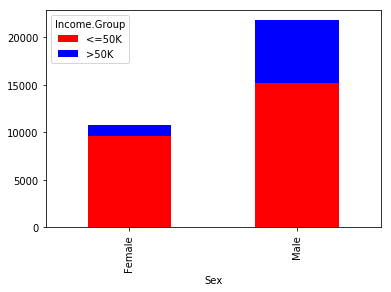

In [23]:
# plotting
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind = 'bar', stacked = True, color = ['red','blue'], grid = False)

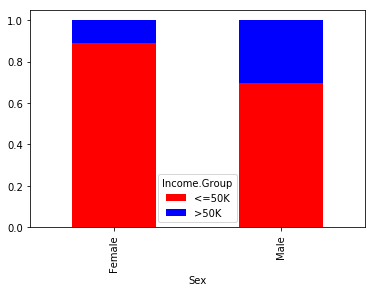

In [24]:
# Plotting percentages of females and males in each group
def perConvert(ser):
    return ser/float(ser[-1])
ct2 = ct.apply(perConvert, axis = 1)
ct2.iloc[:-1,:-1].plot(kind = 'bar', stacked = True, color = ['red','blue'], grid = False)

### 2. Both continuous

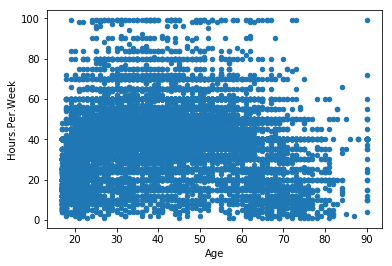

In [25]:
# Scatter plot of age and Hours-per-week
train.plot('Age','Hours.Per.Week', kind ='scatter')

This shows no real relationship between Age and Hours-Per-Week. Even intuitively we were not expecting any specific trend so this is good. In other cases, you might figure out interesting trends which can be exploited.

### 3. Categorical-Continuous combination

In this case, we generally make box-plots for each category. They directly show whether there is a significant difference or not. Let's make one between gender and hours of work

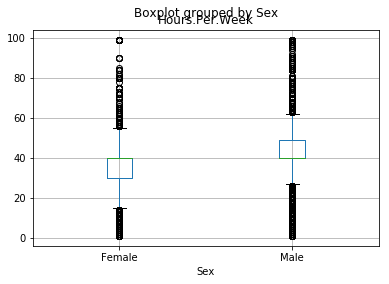

In [26]:


train.boxplot(column = 'Hours.Per.Week', by ='Sex')



- here median of male and female working hours are same
- For Males, the 25% and median values are same
- For females, the median and 75% are same.
- Males have higher working hours in general because the 75% percentile of female corressponds to 25% percentile of males.

### Missing Value Treatment

Lets start by checking the number of missing values in each variable. This can be done by using the apply function like we did before.

### 1. Checking missing values

In [27]:
train.apply(lambda x:sum(x.isnull()))

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [32]:
# checking the miissing data in test data
test.apply(lambda x:sum(x.isnull()))


ID                  0
Age                 0
Workclass         963
Education           0
Marital.Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    274
dtype: int64

Here we have missing values in 3 variables in both test and train:

 - 1.Workclass (categorical)
 - 2.Occupation (categorical)
 - 3.Native-Country (categorical)

Since all of these are categorical, we can simply impute them with the mode values.

### 2. Imputation

Since we want to impute with mode, we'll use the scipy library function mode to do the job.

In [34]:
# import function
from scipy.stats import mode
mode((train['Workclass'].astype(str))).mode[0]

C:\Users\Shrikant\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'Private'

In [35]:
# Imputing values 
var_to_impute = ['Workclass','Occupation', 'Native.Country']
for var in var_to_impute:
    train[var].fillna(mode((train[var].astype(str))).mode[0], inplace = True)
    test[var].fillna(mode((test[var].astype(str))).mode[0], inplace = True)

C:\Users\Shrikant\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [36]:
# noe Check the missing values
train.apply(lambda x:sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

### Outlier Treatment

We can check outliers in numerical variables by creating simple scatter plots. Lets do it for both the numerical variables.

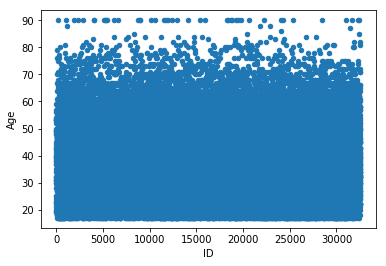

In [37]:
# Checking the outlier by scatter plots
%matplotlib inline
train.plot('ID','Age', kind ='scatter')

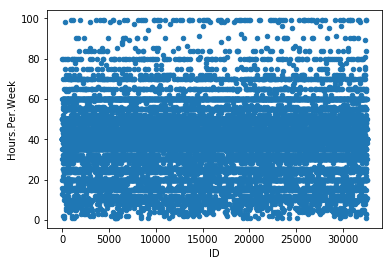

In [38]:
# ID vs Hours-Per-Week
train.plot('ID','Hours.Per.Week', kind = 'scatter')

In both of the above cases, you would notice that there are no real outliers. One thing to note here is that outliers need not just be a value outside the general cluster of data, as shown in the video lecture.

You should also look for values which are not practically possible. For instance, if any of the age or hours per week was negative, then we should certainly treat it like a missing value.

### Variable Transformation

Variable Transformation is not only about creating new variables, but also making the available information more sensible. This stage involves making new variables using existing variables or perform some numerical transformations on variables like taking a log. During univariate analysis, we saw a number of categories with a very small percentage of observations. Let's recall the class of available variables.

In [40]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [39]:
# Determine the percentage of observations in each category
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64

 Depending on the business scenario, we can combine the categories with very few observations. As a thumbrule, lets combine categories with less than 5% of the values.

In [41]:
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [42]:
categories_to_combine = ['State-gov','Self-emp-inc','Federal-gov', 'Without-pay', 'Never-worked']
# Run a loop and replace all the value with others
for cat in categories_to_combine:
    train['Workclass'].replace({cat:'Others'}, inplace = True)
    test['Workclass'].replace({cat : 'Others'}, inplace = True)

Here we can see that the categories have been successfully combined. Note that combining is not the best possible technique for solving the problem of high cardinality, i.e. high number of unique values.

Combining the rest:

Now lets repeat the above process for remaining columns. But we'll use a slightly sophisticated method here so that we can repeat the process quickly using a loop.

Step1: Make a list of variables to combine

In [44]:
# Picking only variables with the dtype = object
categorical_variables = list(train.dtypes.loc[train.dtypes == 'object'].index)
categorical_variables

['Workclass',
 'Education',
 'Marital.Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native.Country',
 'Income.Group']

In [45]:
# Remove workplace variable as already been transformed
categorical_variables = categorical_variables[1:]
categorical_variables

['Education',
 'Marital.Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native.Country',
 'Income.Group']

In [46]:
# Check the current number of unique values
train[categorical_variables].apply(lambda x: len(x.unique()))

Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64

Step2: Run a loop over these values and combine categoriEs

In [47]:
# 2. Run a loop and combine these values
for column in categorical_variables:   
    frq = train[column].value_counts()/train.shape[0]
    categories_to_combine = frq.loc[frq.values<0.05].index
    
    for cat in categories_to_combine:
        train[column].replace({cat:'Others'}, inplace = True)
        test[column].replace({cat : 'Others'}, inplace = True)

In [48]:
train[categorical_variables].apply(lambda x: len(x.unique()))

Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
Income.Group      2
dtype: int64

In [49]:
test[categorical_variables[:-1]].apply(lambda x: len(x.unique()))

Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
dtype: int64

In [50]:
train['Hours.Per.Week'].min()

1

In [51]:
x = pd.cut(train['Hours.Per.Week'],20, labels = range(1,101,5))
x.value_counts()

36    16100
46     3496
41     2442
31     1635
16     1547
61     1519
26     1302
21     1015
56      841
11      645
6       531
71      365
66      277
51      217
1       205
81      182
96      105
76       83
91       34
86       20
Name: Hours.Per.Week, dtype: int64

### Predictive Modeling

Since this is a classification problem, we can start with various models like logistic regression, naive bayes, decision trees, etc. Here we will run a decision tree model as an example.

For modeling using sklearn in Pandas, we have to adopt the following steps:

- 1.Data Preprocessing: sklearn accepts only numeric data so we've to convert text to numbers
- 2.Training model: fit the model on training data
- 3.Making predictions: use the model to make predictions on test data
- 4.Analyze results: compare the train and test accuracy and derive insights required to improve the model

Lets go through these one by one.

#### Step1: Data Preprocessing

sklearn provides a function LabelEncoder for converting categories to numbers in range 0,1..(N-1) where N is the number of categories.

In [53]:
from sklearn.preprocessing import LabelEncoder

categorical_variables = train.dtypes[train.dtypes == 'object'].index
categorical_variables

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [54]:
# Using LabelEncoder
le = LabelEncoder()
for var in categorical_variables:
    train[var] = le.fit_transform(train[var])

for var in categorical_variables[:-1]:
    test[var] = le.fit_transform(test[var])

train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,1,0,2,0,1,2,1,40,1,0
1,2,50,3,0,1,2,0,2,1,13,1,0
2,3,38,2,1,0,5,1,2,1,40,1,0
3,4,53,2,3,1,5,0,0,1,40,1,0
4,5,28,2,0,1,6,2,0,0,40,0,0


In [55]:
train.dtypes

ID                int64
Age               int64
Workclass         int64
Education         int64
Marital.Status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Hours.Per.Week    int64
Native.Country    int64
Income.Group      int64
dtype: object

#### Step2: Fit the model

In [56]:
from sklearn.tree import DecisionTreeClassifier



Defining Predictor variables - these are all variables excluding the target variable Income.Group and ID

In [57]:
dependent_var = 'Income.Group'
independent_vars = [x for x in train.columns if not x in ['ID', dependent_var]]
print (independent_vars)

['Age', 'Workclass', 'Education', 'Marital.Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Hours.Per.Week', 'Native.Country']


Now that we have the predictors, lets run the model with the following benchmark parameters:

    max_depth = 10
    min_samples_leaf = 100
    max_features = 'sqrt'


In [58]:
# Initialize the algorithm
model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf =100, max_features = 'sqrt')
# Fitting the model
model.fit(train[independent_vars], train[dependent_var])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Step3: Make predictions

In [59]:
predictions_train = model.predict(train[independent_vars])
predictions_test = model.predict(test[independent_vars])
print (predictions_test)

[0 0 0 ..., 1 0 1]


#### Step4: Analyze results:

Various metrics can be used to evaluate a model depending on the problem at hand. Confusion matrix is a NXN matrix where N is the number of class predicted. It maps the number of labels which get classified correctly and incorrectly. This matrix is easy to interpret and is being used popularly. Let's use prediction accuracy here.

In [60]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(train[dependent_var], predictions_train)
print ('Training Dataset Accuracy: ', acc_train)

Training Dataset Accuracy:  0.81631399527


In [61]:
d = {'ID':test['ID'].values, 'Income.Group': predictions_test}
submission = pd.DataFrame(data = d)
submission['Income.Group'] = submission['Income.Group'].replace({0 : '<=50K', 1 : '>=50K'})

In [62]:
# Save file to CSV
submission.to_csv('submission.csv')